# Crime is bad! Even worse, people still do it!
##### *A colorful journey through space and data analytics, lead by your guide, Jarrod Masarik*
### I will be doing the crime analytics side of the final project, I will analyze areas and their respective frequencies of crimes committed, and the severity of said crimes. A foreword, a violent crime is defined as "a crime in which an offender or perpetrator uses or threatens to use harmful force upon a victim. This entails both crimes in which the violent act is the objective, such as murder, assault, rape and assassination, as well as crimes in which violence is used as a method of coercion or show of force, such as robbery, extortion and terrorism" (Wikipedia or whatever). Now please, join me!

In [8]:
# gather libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# open file
crimeFile = pd.read_csv("crime.csv")
# crimeFile # test of file, it works
# /////////////////////////////////////////////////////////////////
# domain of crimes, lets just look at crimes in general..
crimes = ['2701 Simple Assault.', 
          '9015 Failure To Appear/Arrest on Attachment Order',
          '9501 Bench Warrant', 
          '13(a)(32) Paraphernalia - Use or Possession', 
          '2718(a)(1) Strangulation - Applying Pressure to the Throat or Neck', 
          '3929 Retail Theft.',
          '3802(a)(1) DUI - General Impairment',
          '2706 Terroristic Threats.',
          '13(a)(31) Marijuana: Possession Small Amount',
          '9093 Indirect Criminal Contempt',
          '3925 Receiving Stolen Property.',
          '3921(a) Theft by Unlawful Taking or Disposition - Movable item',
          '6318 Unlawful Contact/Communication w/ Minor',
          '3126(a)(8) Indecent assault of person under 16',
          '3701 Robbery.',
          '2902 Unlawful Restraint.',
          '3934 Theft from Vehicle',
          '3502 Burglary.',
          '4904 Unsworn Falsification to Authorities.',
          '3802(c) DUI - Highest Rate of Alcohol - BAC >= .16%'
         ]
# keep track of violent crime amounts
crimeTowns = dict()
crimeAmt = dict.fromkeys(crimes, 0)
# print(crimeAmt)
# okay wait, might have to broaden the domain of crimes, thankfully, criminals around pittsburgh aren't committing human rights violations, they're just trashy...

# begin parsing
for i, r in crimeFile.iterrows():
    currCrime = r['OFFENSES']
    currTown = r['INCIDENTNEIGHBORHOOD']
    if currCrime in crimes:
        if currTown not in crimeTowns:
            crimeTowns[currTown] = 1
        else:
            crimeTowns[currTown] += 1
for town, crimeTally in crimeTowns.items():
    print(town, crimeTally)

Bloomfield 273
Westwood 52
Greenfield 127
Brookline 311
Carrick 583
Crafton Heights 153
South Side Flats 619
Marshall-Shadeland 322
Central Oakland 105
Strip District 99
Allegheny Center 339
Troy Hill-Herrs Island 3
Highland Park 136
Homewood North 467
Brighton Heights 260
Golden Triangle/Civic Arena 28
East Allegheny 556
Fineview 181
Central Northside 4
Bluff 357
Homewood West 188
Lincoln-Lemington-Belmar 307
Arlington 90
South Side Slopes 178
Garfield 171
North Shore 125
Beechview 274
Mount Washington 308
California-Kirkbride 77
Banksville 66
Glen Hazel 30
Polish Hill 27
Knoxville 333
Allentown 252
Perry South 223
Elliott 176
Sheraden 316
East Liberty 502
Middle Hill 238
Central Lawrenceville 104
Upper Hill 93
Terrace Village 58
Crawford-Roberts 226
East Hills 258
Squirrel Hill South 169
Hazelwood 303
Beltzhoover 111
Friendship 55
Bon Air 48
Homewood South 499
Spring Hill-City View 160
Morningside 44
Esplen 52
West Oakland 64
Point Breeze North 53
Shadyside 219
Point Breeze 67
Northv

# Here is Sorted Crime

In [29]:
sort_crime = sorted(crimeTowns.items(), key=lambda x: x[1], reverse=False)
# for town, crimeTally in sort_crime.items():
#    print(town, crimeTally)
# print(type(sort_crime))
for i in sort_crime:
	print(i[0], i[1])

Mt. Oliver Boro 1
Troy Hill-Herrs Island 3
Central Northside 4
Ridgemont 4
Chartiers City 6
New Homestead 7
Regent Square 9
Swisshelm Park 11
St. Clair 11
Outside County 12
East Carnegie 14
Outside State 15
Hays 19
Summer Hill 20
Oakwood 21
Mount Oliver 23
Windgap 23
Allegheny West 26
Polish Hill 27
Arlington Heights 27
Golden Triangle/Civic Arena 28
Glen Hazel 30
Fairywood 31
Duquesne Heights 34
Upper Lawrenceville 38
Morningside 44
Squirrel Hill North 47
Bon Air 48
Westwood 52
Esplen 52
Point Breeze North 53
West End 53
Friendship 55
Lower Lawrenceville 56
Terrace Village 58
Lincoln Place 58
South Shore 58
Spring Garden 63
West Oakland 64
Banksville 66
Stanton Heights 66
Point Breeze 67
Outside City 68
Overbrook 73
California-Kirkbride 77
South Oakland 80
Chateau 82
Troy Hill 86
Arlington 90
Upper Hill 93
Strip District 99
Central Lawrenceville 104
Central Oakland 105
Manchester 107
Beltzhoover 111
North Oakland 116
North Shore 125
Greenfield 127
Highland Park 136
Perry North 139
Nor

# Time to Graph our Statistics!

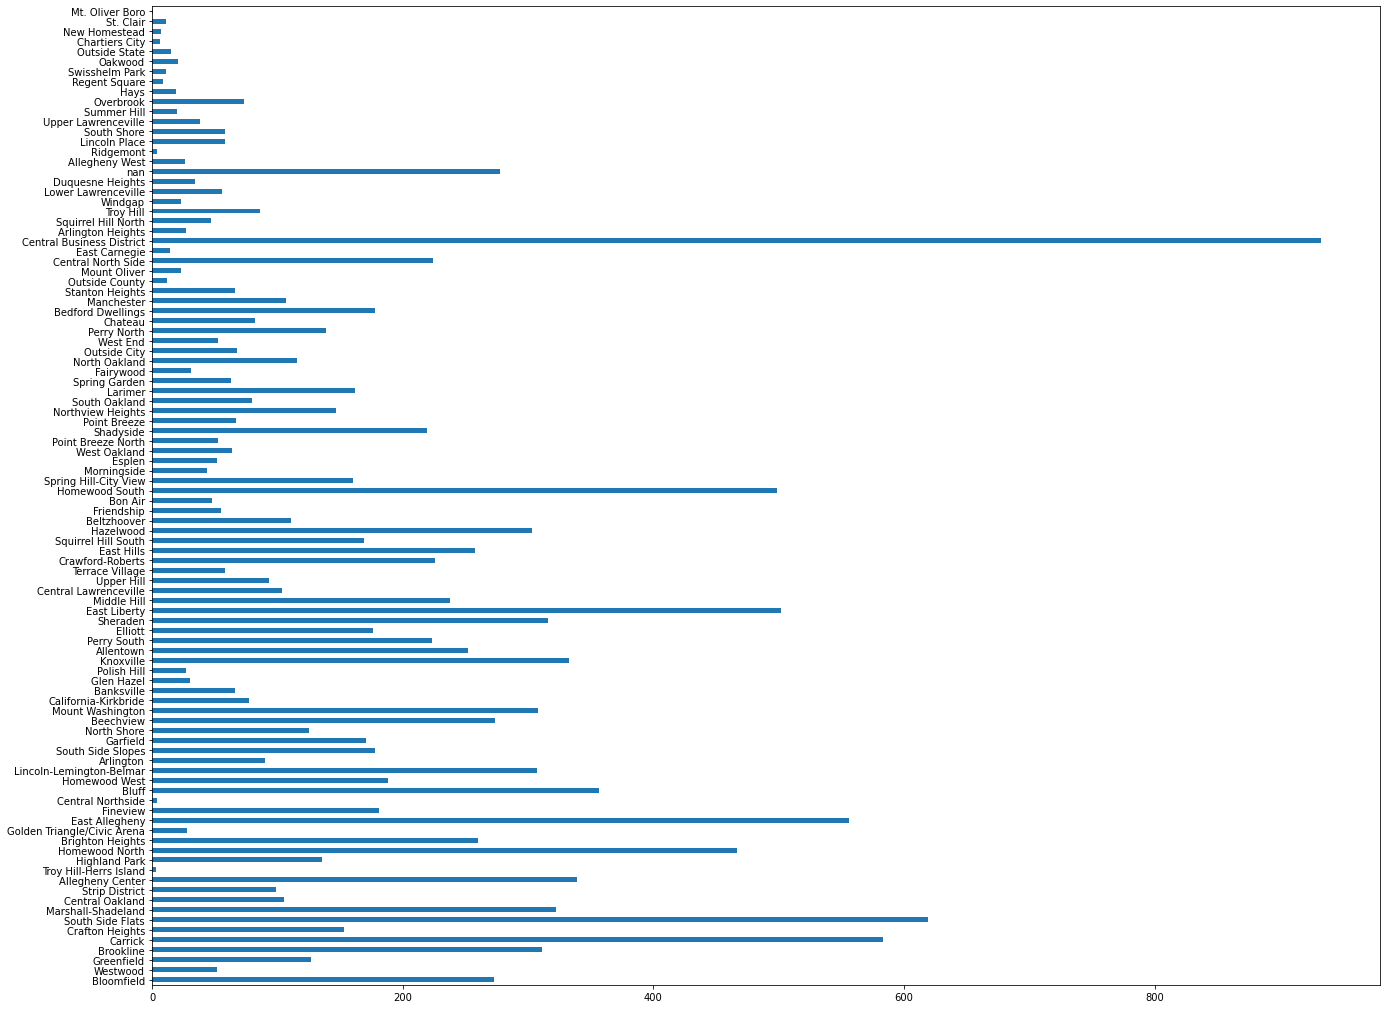

In [10]:
towns = []
score = []

for town in crimeTowns.keys(): 
    towns.append(town)
for s in crimeTowns.values(): 
    score.append(s)
g = pd.Series(score, index = towns)
g.ylabel = "Town of Crime"
g.xlabel = "Crime Score (Higher is a population with denser offenses)"
g.plot(kind = 'barh', figsize = (22, 18))
#g.sort_values().plot.bar(kind = 'barh', figsize = (22, 18))

# Normalized

In [49]:
# create a new dict w 30 lowest criminally active towns
tempTown = dict(crimeTowns)
safeTowns = dict()
# this sorts our town in descending order
tempTown = {k: v for k, v in sorted(tempTown.items(), key=lambda item: item[1])}
z = 0 # counter stupid variable, i hate this thing
# this seems like a very silly way to do this, whatever..
for i in tempTown:
    z = z + 1
    # print(i) # wellness check
    if z < 10:
        safeTowns[i] = 10
    elif z >= 10 and z < 20:
        safeTowns[i] = 9
    elif z >= 20 and z < 30:
        safeTowns[i] = 8
    elif z >= 30 and z < 40:
        safeTowns[i] = 7
    elif z >= 40 and z < 50:
        safeTowns[i] = 6
    elif z >= 50 and z < 60:
        safeTowns[i] = 5
    elif z >= 60 and z < 70:
        safeTowns[i] = 4
    elif z >= 70 and z < 80:
        safeTowns[i] = 3
    elif z >= 80 and z < 90:
        safeTowns[i] = 2
    elif z >= 90 and z < 100:
        safeTowns[i] = 1

for key, value in safeTowns.items():
    print(key, ' : ', value) 
    

Mt. Oliver Boro  :  10
Troy Hill-Herrs Island  :  10
Central Northside  :  10
Ridgemont  :  10
Chartiers City  :  10
New Homestead  :  10
Regent Square  :  10
Swisshelm Park  :  10
St. Clair  :  10
Outside County  :  9
East Carnegie  :  9
Outside State  :  9
Hays  :  9
Summer Hill  :  9
Oakwood  :  9
Mount Oliver  :  9
Windgap  :  9
Allegheny West  :  9
Polish Hill  :  9
Arlington Heights  :  8
Golden Triangle/Civic Arena  :  8
Glen Hazel  :  8
Fairywood  :  8
Duquesne Heights  :  8
Upper Lawrenceville  :  8
Morningside  :  8
Squirrel Hill North  :  8
Bon Air  :  8
Westwood  :  8
Esplen  :  7
Point Breeze North  :  7
West End  :  7
Friendship  :  7
Lower Lawrenceville  :  7
Terrace Village  :  7
Lincoln Place  :  7
South Shore  :  7
Spring Garden  :  7
West Oakland  :  7
Banksville  :  6
Stanton Heights  :  6
Point Breeze  :  6
Outside City  :  6
Overbrook  :  6
California-Kirkbride  :  6
South Oakland  :  6
Chateau  :  6
Troy Hill  :  6
Arlington  :  6
Upper Hill  :  5
Strip District 

#### Above is my version of the normalized, safest cities within Pittsburgh, we are doing a 1-10 scale, as it will be easier to combine our metrics. Seeminly, Mt. Oliver Boro is the safest town in Pittsburgh, by metric of criminal activity. I would've thought Squirrel Hill, but the numbers don't lie. Additionally, I also see that the South Side Flats are one of the most unsafe towns in Pittsburgh, this was not a surprise.